<a href="https://colab.research.google.com/github/sitthatkaja/ThesisM.Sc./blob/main/Classify_roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [ ]:
!pip install tensorflow tensorflow_hub

In [ ]:
from roboflow import Roboflow
import tensorflow as tf

rf = Roboflow(api_key="VhsGC6YHX6iQiGiIYPPJ")
project = rf.workspace("sitthatkaja").project("born")
version = project.version(1)
dataset = version.download("clip")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BorN-1 in clip:: 100%|██████████| 59/59 [00:00<00:00, 585.32it/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_dir = '/content/BorN-1/train'
val_dir = '/content/BorN-1/valid'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# สร้าง data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 31 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator)

Epoch 1/10
1/1 [==============================] - 10s 10s/step - loss: 0.6918 - accuracy: 0.6452 - val_loss: 1.1475 - val_accuracy: 0.7778
Epoch 2/10
1/1 [==============================] - 8s 8s/step - loss: 1.3326 - accuracy: 0.7419 - val_loss: 0.5292 - val_accuracy: 0.7778
Epoch 3/10
1/1 [==============================] - 5s 5s/step - loss: 0.5693 - accuracy: 0.7419 - val_loss: 0.6558 - val_accuracy: 0.7778
Epoch 4/10
1/1 [==============================] - 4s 4s/step - loss: 0.6600 - accuracy: 0.7419 - val_loss: 0.6504 - val_accuracy: 0.7778
Epoch 5/10
1/1 [==============================] - 4s 4s/step - loss: 0.6556 - accuracy: 0.7419 - val_loss: 0.6090 - val_accuracy: 0.7778
Epoch 6/10
1/1 [==============================] - 5s 5s/step - loss: 0.6213 - accuracy: 0.7419 - val_loss: 0.5458 - val_accuracy: 0.7778
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 0.5742 - accuracy: 0.7419 - val_loss: 0.5394 - val_accuracy: 0.7778
Epoch 8/10
1/1 [=======================

In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy:.2f}")

1/1 [==============================] - 0s 322ms/step - loss: 0.5441 - accuracy: 0.7778
Validation Accuracy: 0.78


---

---

1/1 [==============================] - 0s 151ms/step


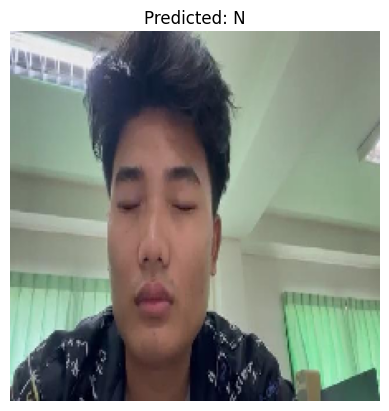

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# เลือกไฟล์รูปภาพที่ต้องการทำนาย
img_path = '/content/BorN-1/test/B/Blink-and-no-1-_mp4-0040_jpg.rf.8646a3df927084e7cfd84858f6c29b0d.jpg'  # เปลี่ยนเป็น path ของรูปภาพที่ต้องการทำนาย

# โหลดภาพและปรับขนาดให้เข้ากับ input_shape ของโมเดล
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # ทำการ normalize ค่า pixel

# ทำนายโดยใช้โมเดล
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# แสดงรูปภาพพร้อมกับผลทำนาย
plt.imshow(img)
plt.axis('off')

# แสดง label ที่ทำนาย
predicted_label = train_generator.class_indices
plt.title(f'Predicted: {list(predicted_label.keys())[predicted_class]}')

plt.show()


1/1 [==============================] - 0s 62ms/step


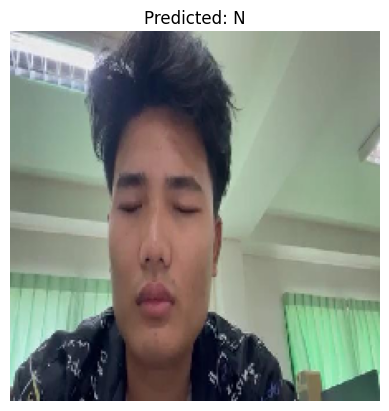

In [ ]:
# เลือกไฟล์รูปภาพที่ต้องการทำนาย
img_path = '/content/BorN-1/valid/B/Blink-and-no-1-_mp4-0035_jpg.rf.68795a5e21d13955ff265d4b432d124b.jpg'  # เปลี่ยนเป็น path ของรูปภาพที่ต้องการทำนาย

# โหลดภาพและปรับขนาดให้เข้ากับ input_shape ของโมเดล
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # ทำการ normalize ค่า pixel

# ทำนายโดยใช้โมเดล
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# แสดงรูปภาพพร้อมกับผลทำนาย
plt.imshow(img)
plt.axis('off')

# แสดง label ที่ทำนาย
predicted_label = train_generator.class_indices
plt.title(f'Predicted: {list(predicted_label.keys())[predicted_class]}')

plt.show()
